# Opportunity in the NYC Restaurant Scene

Authors: Donna Lee & Zachary Greenberg

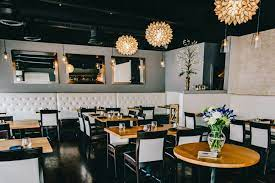

# Overview 

This project uses Yelp data to analyze the Chinese and Italian restaurant scene in New York City to narrow down the location and cuisine type of a possible new restaurant. There's definitely no shortage of either type of restaurant in the city which indicates high demand. We utilized ratings, location, modality, and more in our analysis to sway our decision for the best possible option.

# Business Problem

Tasked with opening a new restaurant in NYC, we narrowed down our choices between Chinese and Italian for the type of cuisine. Being that there is a surplus of both types of restaurants, we decided to look for ways to be innovative to offer something that is not your usual type of eatery.

# Data Collection

With the help of the Yelp API, we extracted information on 489 Chinese restaurants and 546 Italian restaurants in New York City. We looked at the following information from each restaurant:

* *Location*
* *Price Range*
* *Ratings*
* *Sample of 3 Reviews per Restaurant*
* *Delivery Options*


# Data Preparation

In [1]:
#import basic packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading in the dataframe
restaurant = pd.read_csv('Data/Restaurant.csv')
restaurant.head(2)

,Business Id,Business Name,Type,Latitude,Longitude,Ratings,Review_Counts,Price,Zipcode,Delivery
0,dh5r9-SbN8xJ76XvnayWLQ,Giano Restaurant,Italian,40.726226,-73.984057,4.5,614,$$,10009,True
1,Vs8kQ4R381y27AH018gLpg,Supper,Italian,40.722900,-73.985270,4.0,1315,$$,10009,True


In [3]:
#checking for null values
restaurant.isnull().sum()

Business Id      0
Business Name    0
Type             0
Latitude         0
Longitude        0
Ratings          0
Review_Counts    0
Price            0
Zipcode          0
Delivery         0
dtype: int64

Fortunately, there are no null values in our collected dataset. This makes things easier as we proceed with our data exploration. 

In [4]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Business Id    1035 non-null   object 
 1   Business Name  1035 non-null   object 
 2   Type           1035 non-null   object 
 3   Latitude       1035 non-null   float64
 4   Longitude      1035 non-null   float64
 5   Ratings        1035 non-null   float64
 6   Review_Counts  1035 non-null   int64  
 7   Price          1035 non-null   object 
 8   Zipcode        1035 non-null   int64  
 9   Delivery       1035 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 73.9+ KB


In [5]:
restaurant.Price.value_counts()

$$      509
$       352
$$$     157
$$$$     17
Name: Price, dtype: int64

After checking the dtypes, all of the variables of the correct type. This includes the Price variable, an object, because the prices are reflected in dollar signs signifying intensity. 

# Data Exploration

In [6]:
#checking the descriptive stats of the numerical variables
restaurant.describe()

,Latitude,Longitude,Ratings,Review_Counts,Zipcode
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,40.721224,-73.987800,3.819324,278.343961,10461.581643
std,0.330702,0.741952,0.463580,408.902392,2311.299785
min,30.253537,-97.763551,2.000000,2.000000,7002.000000
25%,40.700332,-73.995584,3.500000,51.000000,10013.000000
50%,40.732097,-73.976613,4.000000,152.000000,10037.000000
75%,40.763032,-73.942876,4.000000,334.000000,11215.000000
max,40.980500,-73.651640,5.000000,5652.000000,78704.000000


Being that the ratings are on a 1-5 scale, the average ratings for these 1035 restaurants is quite high at a 3.8. It is also worth noting that the range of the number of review_counts is quite large, spanning from 2 to 5652.

Based on our investigation of the average rating, above, we decided to go a step further and see the influence of each Type of restaurant on the mean

In [7]:
restaurant.groupby("Type")['Ratings'].mean()

Type
Chinese    3.659509
Italian    3.962454
Name: Ratings, dtype: float64

Italian restaurants seem to have a slightly higher rating than Chinese restaurants in our dataset.

In [8]:
#This is the distribution of Italian restaurants by Price
restaurant[restaurant['Type'] == 'Italian']['Price'].value_counts(normalize=True)*100

$$      68.681319
$$$     26.739927
$$$$     2.747253
$        1.831502
Name: Price, dtype: float64

In [9]:
#This is the distribution of Chinese restaurants by Price
restaurant[restaurant['Type'] == 'Chinese']['Price'].value_counts(normalize=True)*100

$       69.938650
$$      27.402863
$$$      2.249489
$$$$     0.408998
Name: Price, dtype: float64

Comparing the two price points between Chinese and Italian restaurants above, we discovered there is a lack of higher end Chinese restaurants signifying a market opportunity.

Now especially, during Covid times, we understand that delivery services are being used more frequently. Knowing full well that Chinese restaurants have great potential we wanted to look into the delivery factor and whether or not it should play a part it our decision.

In [10]:
restaurant[restaurant['Type']=='Chinese'].groupby('Ratings')['Delivery'].mean()

Ratings
2.0    1.000000
2.5    0.941176
3.0    0.960526
3.5    0.932584
4.0    0.870588
4.5    0.761905
5.0    0.200000
Name: Delivery, dtype: float64

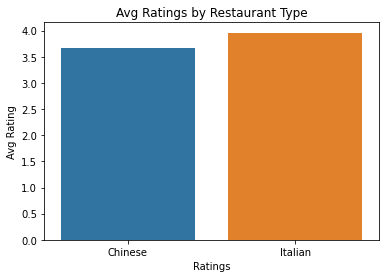

In [11]:
#Bar Garph of Average Ratings
avg_ratings = list(restaurant.groupby("Type")['Ratings'].mean().values)

rounded_ratings = [round(rating, 2) for rating in avg_ratings]

fig,ax = plt.subplots()
ax = sns.barplot(x=list(restaurant.groupby("Type")['Ratings'].mean().index), 
                 y=rounded_ratings, data = restaurant.groupby("Type")['Ratings'].mean())
ax.set_xticklabels(['Chinese', 'Italian'])
ax.set_ylabel('Avg Rating')
ax.set_title('Avg Ratings by Restaurant Type')
plt.savefig('Images/avg_rating_by_type.png')

This bar graph of ratings by restaurant type shows that Chinese restaurants are often lower in rating

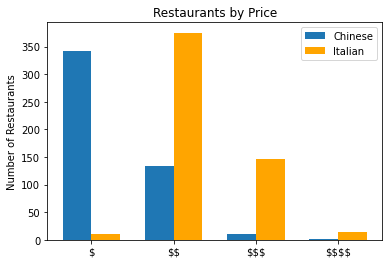

In [12]:
#RESTAURANT BY PRICE BAR GRAPH

by_price = restaurant.groupby(['Price', 'Type'])['Business Id'].count().unstack()

labels = ["$","\$\$",'\$\$\$','\$\$\$\$']

x = np.arange(len(labels))
width=.35 

fig, ax = plt.subplots()
chinese = ax.bar(x - width/2, by_price['Chinese'].values, width, label = 'Chinese')
italian = ax.bar(x + width/2, by_price['Italian'].values, width, label = 'Italian', color = 'orange')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Restaurants by Price')
ax.set_xticks(list(range(4)))
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('Images/restaurants_by_price.png')

The bar graph below shows the distribution of price points for Chinese and Italian restaurants. We noticed a lack of high end Chinese restaurants.

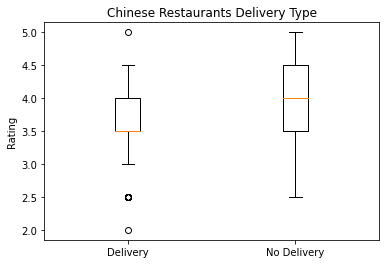

In [13]:
#DELIVERY BOX PLOTS

#splitting the data into separate categories for easy manipulation
chinese_restaurants = restaurant[restaurant['Type'] == 'Chinese']

fig, ax = plt.subplots()
ax.boxplot([chinese_restaurants[chinese_restaurants['Delivery']==True]['Ratings'], chinese_restaurants[chinese_restaurants['Delivery']==False]['Ratings']])
ax.set_xticklabels(['Delivery', 'No Delivery'])
ax.set_ylabel('Rating')
ax.set_title('Chinese Restaurants Delivery Type')
plt.savefig('Images/chinese_delivery_and_rating.png')

These boxplots demonstrate that delivery services don't necessarily mean higher ratings.

This map shows the location distribution of our sample for Chinese restaurants. From here we were able to determine prime locations based on lack of surrounding competition.

In [14]:
import folium

restaurant_list =  [list(x) for x in zip(chinese_restaurants['Latitude'].values,
                                         chinese_restaurants['Longitude'].values,
                                         chinese_restaurants['Business Name'].values,
                                         chinese_restaurants['Type'].values)] 

nyc_map = folium.Map(location=[40.7589, -73.9851], zoom_start = 14)

def markers(iterables, nyc_map):
    """
    This function creates markers with popup labels and adds them to the map
    of NYC for a visual reference of restaurant locations
    """
    markers = list(map(lambda iterable: folium.Marker(location = iterable[:2],
                                                      popup = f'{iterable[2]}: {iterable[3]}'), iterables))
    for marker in markers:
        marker.add_to(nyc_map)
    
    return nyc_map

Chinese_Restaurant_Map = markers(restaurant_list, nyc_map)
Chinese_Restaurant_Map.save('Images/Chinese_Restaurant_Map.html')

## Conclusions

After analyzing the Yelp data, we decided it would be best to open a high end Chinese restaurant in the Upper West Side.

* **There is a huge open opportunity for high-end Chinese restaurants in New York City.** Of our sample size, only 0.41% of Chinese restaurants had 4 dollar signs, signifying a majority of lower price point Chinese restaurants.

* **To maintain the exclusivity and experience of the restaurant, there will be no delivery option.** The difference in average rating for restaurants that had a delivery option versus no delivery option was insignificant. We decided that it would be wiser to not offer a delivery option because it provided no extra value in terms of better ratings and would allow the restaurant to cut costs.

* **The Upper West Side has a lower density of Chinese restaurants.** This area would be great for our new restaurant due to the lack of surrounding competition.